In [1]:
pip install pandas

     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     --------------------------------- ------ 51.2/60.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 649.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.4/11.0 MB 8.7 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/11.0 MB 15.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.2/11.0 MB 15.0 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/11.0 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/11.0 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/11.0 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/11.0 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.2/11.0 MB 6.5 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/11.0 MB 6.7 MB/s eta 0:00:02


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

In [3]:
testing = pd.read_csv("Dataset_Talento.csv")

In [6]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              6000 non-null   object 
 1   turno                  6000 non-null   object 
 2   operador_id            6000 non-null   object 
 3   maquina_id             6000 non-null   object 
 4   producto_id            6000 non-null   object 
 5   temperatura            5820 non-null   float64
 6   vibración              5820 non-null   float64
 7   humedad                5820 non-null   float64
 8   tiempo_ciclo           5820 non-null   float64
 9   fallo_detectado        6000 non-null   object 
 10  tipo_fallo             599 non-null    object 
 11  cantidad_producida     6000 non-null   int64  
 12  unidades_defectuosas   6000 non-null   int64  
 13  eficiencia_porcentual  5820 non-null   float64
 14  consumo_energia        5820 non-null   float64
 15  para


<br><br>
<br>
Modulo de limpieza


In [9]:
testing = pd.read_csv("Dataset_Talento.csv")

print("=== DATA CLEANING: REMOVING ROWS WITH NaN IN SPECIFIC COLUMNS ===\n")

# Define the columns that cannot have NaN values
critical_columns = ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo', 'eficiencia_porcentual', 'consumo_energia']

print(f"Critical columns (cannot have NaN): {critical_columns}")
print("=" * 60)

# Get initial dataset info
initial_rows = len(testing)
print(f"Initial dataset: {initial_rows} rows")

# Check which critical columns exist in the dataset
existing_critical_cols = [col for col in critical_columns if col in testing.columns]
missing_critical_cols = [col for col in critical_columns if col not in testing.columns]

print(f"\nFound critical columns: {existing_critical_cols}")
if missing_critical_cols:
    print(f"Missing critical columns: {missing_critical_cols}")

# Show NaN count in critical columns before cleaning
print(f"\nNaN count in critical columns BEFORE cleaning:")
for col in existing_critical_cols:
    nan_count = testing[col].isna().sum()
    print(f"  {col}: {nan_count} NaN values")

# Remove rows with NaN in any of the existing critical columns
if existing_critical_cols:
    testing_clean = testing.dropna(subset=existing_critical_cols).reset_index(drop=True)
else:
    print("No critical columns found in dataset - no cleaning performed")
    testing_clean = testing.copy()

# Calculate cleaning results
final_rows = len(testing_clean)
removed_rows = initial_rows - final_rows

print(f"\nCLEANING RESULTS:")
print("=" * 40)
print(f"Rows before cleaning: {initial_rows}")
print(f"Rows after cleaning:  {final_rows}")
print(f"Rows removed:         {removed_rows}")
print(f"Data retention:       {(final_rows/initial_rows*100):.1f}%")


# Show overall dataset info after cleaning
print("\n" + "=" * 80)
print("DATASET INFO AFTER CLEANING:")
print("=" * 80)
for i, col in enumerate(testing_clean.columns, 1):
    dtype = testing_clean[col].dtype
    non_null = testing_clean[col].count()
    total = len(testing_clean)
    null_count = total - non_null
    null_pct = (null_count/total*100) if total > 0 else 0

    # Mark critical columns
    marker = " ★" if col in existing_critical_cols else ""

    print(f"{i:2d}. {col:25s} | {str(dtype):10s} | {non_null:4d}/{total} non-null | {null_count:3d} NaN ({null_pct:5.1f}%){marker}")


=== DATA CLEANING: REMOVING ROWS WITH NaN IN SPECIFIC COLUMNS ===

Critical columns (cannot have NaN): ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo', 'eficiencia_porcentual', 'consumo_energia']
Initial dataset: 6000 rows

Found critical columns: ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo', 'eficiencia_porcentual', 'consumo_energia']

NaN count in critical columns BEFORE cleaning:
  temperatura: 180 NaN values
  vibración: 180 NaN values
  humedad: 180 NaN values
  tiempo_ciclo: 180 NaN values
  eficiencia_porcentual: 180 NaN values
  consumo_energia: 180 NaN values

CLEANING RESULTS:
Rows before cleaning: 6000
Rows after cleaning:  4991
Rows removed:         1009
Data retention:       83.2%

DATASET INFO AFTER CLEANING:
 1. timestamp                 | object     | 4991/4991 non-null |   0 NaN (  0.0%)
 2. turno                     | object     | 4991/4991 non-null |   0 NaN (  0.0%)
 3. operador_id               | object     | 4991/4991 non-null |   0 NaN (  0.0%)
 

In [19]:
testing_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4991 entries, 0 to 4990
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   timestamp              4991 non-null   object  
 1   turno                  4991 non-null   object  
 2   operador_id            4991 non-null   object  
 3   maquina_id             4991 non-null   object  
 4   producto_id            4991 non-null   object  
 5   temperatura            4991 non-null   float64 
 6   vibración              4991 non-null   float64 
 7   humedad                4991 non-null   float64 
 8   tiempo_ciclo           4991 non-null   float64 
 9   fallo_detectado        4991 non-null   object  
 10  tipo_fallo             495 non-null    object  
 11  cantidad_producida     4991 non-null   int64   
 12  unidades_defectuosas   4991 non-null   int64   
 13  eficiencia_porcentual  4991 non-null   float64 
 14  consumo_energia        4991 non-null   f

<br>
Testing cositas

In [23]:
testing = testing_clean.copy

Available numerical columns for analysis: ['cantidad_producida', 'unidades_defectuosas', 'paradas_programadas', 'paradas_imprevistas']

=== TIME-BASED CORRELATION ANALYSIS ON CLEANED DATA ===

Analyzing relationships between time features and manufacturing variables

==================== HOUR ANALYSIS ====================

Correlations with hour:
------------------------------------------------------------
unidades_defectuosas | r= 0.021     | p=0.110
paradas_imprevistas  | r= 0.009     | p=0.493
paradas_programadas  | r= 0.006     | p=0.665
cantidad_producida   | r= 0.001     | p=0.912

==================== DAY_OF_WEEK ANALYSIS ====================

Correlations with day_of_week:
------------------------------------------------------------
paradas_imprevistas  | r= 0.030 *   | p=0.018
cantidad_producida   | r= 0.008     | p=0.539
unidades_defectuosas | r=-0.003     | p=0.844
paradas_programadas  | r=-0.000     | p=0.973

Significant relationships with day_of_week:
• paradas_imprevista

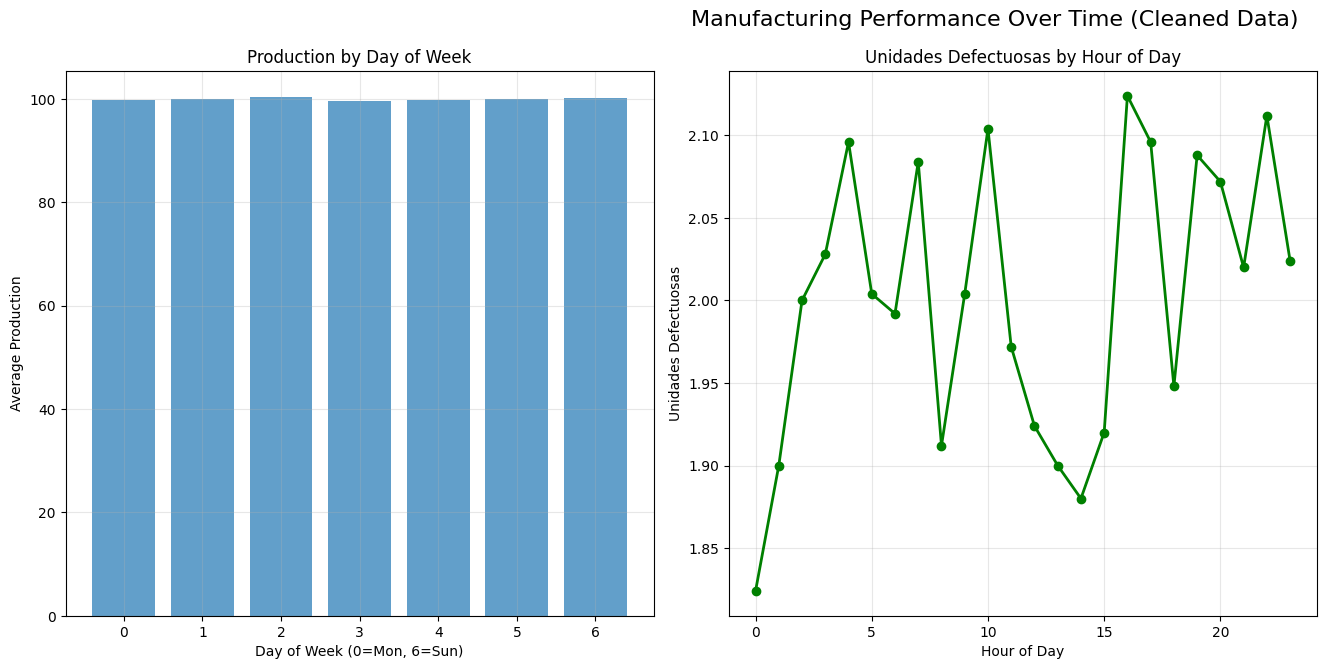


TIME-BASED PERFORMANCE SUMMARY (CLEANED DATA):
Best production day: Wednesday (100.38 units)
Worst production day: Thursday (99.69 units)
Best quality day: Wednesday (1.94 defects)
Worst quality day: Monday (2.05 defects)

INTERPRETATION NOTES:
* Analysis now performed on cleaned data without empty cells
* Correlations may be stronger/cleaner due to removal of problematic columns
* Significant correlations (p < 0.05) marked with * ** ***
* Compare results with previous analysis to see cleaning impact


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')


# Convert timestamp to datetime and extract time-based features
testing_clean['timestamp'] = pd.to_datetime(testing_clean['timestamp'])
testing_clean['hour'] = testing_clean['timestamp'].dt.hour
testing_clean['day_of_week'] = testing_clean['timestamp'].dt.dayofweek  # 0=Monday, 6=Sunday
testing_clean['day_of_month'] = testing_clean['timestamp'].dt.day
testing_clean['month'] = testing_clean['timestamp'].dt.month
testing_clean['minute'] = testing_clean['timestamp'].dt.minute

# Select numerical columns for correlation analysis (only from cleaned data)
available_numerical_cols = []
potential_cols = ['temperatura', 'vibración', 'humedad', 'tiempo_ciclo',
                  'cantidad_producida', 'unidades_defectuosas',
                  'eficiencia_porcentual', 'consumo_energia',
                  'paradas_programadas', 'paradas_imprevistas']

for col in potential_cols:
    if col in testing_clean.columns:
        available_numerical_cols.append(col)

print(f"Available numerical columns for analysis: {available_numerical_cols}")

# Time-based features to analyze
time_features = ['hour', 'day_of_week', 'day_of_month', 'month', 'minute']

print("\n=== TIME-BASED CORRELATION ANALYSIS ON CLEANED DATA ===\n")
print("Analyzing relationships between time features and manufacturing variables")
print("=" * 80)

# Analyze each time feature
for time_feature in time_features:
    print(f"\n{'='*20} {time_feature.upper()} ANALYSIS {'='*20}")

    correlations = []
    for col in available_numerical_cols:
        # Remove NaN values for pairwise correlation
        valid_data = testing_clean[[time_feature, col]].dropna()

        if len(valid_data) > 0:
            # Pearson correlation
            pearson_corr, pearson_p = pearsonr(valid_data[time_feature], valid_data[col])

            # Spearman correlation (for non-linear relationships)
            spearman_corr, spearman_p = spearmanr(valid_data[time_feature], valid_data[col])

            correlations.append({
                'Variable': col,
                'Pearson_Corr': pearson_corr,
                'Pearson_p_value': pearson_p,
                'Spearman_Corr': spearman_corr,
                'Spearman_p_value': spearman_p,
                'Sample_Size': len(valid_data)
            })

    # Convert to DataFrame and sort by correlation strength
    corr_df = pd.DataFrame(correlations)
    if len(corr_df) > 0:
        corr_df = corr_df.sort_values('Pearson_Corr', key=abs, ascending=False)

        print(f"\nCorrelations with {time_feature}:")
        print("-" * 60)
        for _, row in corr_df.iterrows():
            significance = "***" if row['Pearson_p_value'] < 0.001 else "**" if row['Pearson_p_value'] < 0.01 else "*" if row['Pearson_p_value'] < 0.05 else ""
            print(f"{row['Variable']:20s} | r={row['Pearson_Corr']:6.3f} {significance:3s} | p={row['Pearson_p_value']:.3f}")

        # Identify significant relationships
        significant_relations = corr_df[corr_df['Pearson_p_value'] < 0.05]

        if len(significant_relations) > 0:
            print(f"\nSignificant relationships with {time_feature}:")
            for _, row in significant_relations.iterrows():
                strength = "Strong" if abs(row['Pearson_Corr']) > 0.3 else "Moderate" if abs(row['Pearson_Corr']) > 0.2 else "Weak"
                direction = "increases" if row['Pearson_Corr'] > 0 else "decreases"

                print(f"• {row['Variable']}: {strength} - as {time_feature} increases, {row['Variable']} {direction}")
                print()
    else:
        print(f"No numerical variables available for {time_feature} analysis")

# Create comprehensive time-based visualizations (only for available columns)
if len(available_numerical_cols) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    plot_idx = 0

    # Hour-based analysis for key variables
    if 'eficiencia_porcentual' in available_numerical_cols:
        ax = axes[plot_idx]
        hourly_efficiency = testing_clean.groupby('hour')['eficiencia_porcentual'].mean().reset_index()
        ax.plot(hourly_efficiency['hour'], hourly_efficiency['eficiencia_porcentual'], 'b-o', linewidth=2)
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Efficiency %')
        ax.set_title('Efficiency by Hour of Day')
        ax.grid(True, alpha=0.3)
        plot_idx += 1

    # Production by day of week
    if 'cantidad_producida' in available_numerical_cols:
        ax = axes[plot_idx]
        dow_production = testing_clean.groupby('day_of_week')['cantidad_producida'].mean().reset_index()
        ax.bar(dow_production['day_of_week'], dow_production['cantidad_producida'], alpha=0.7)
        ax.set_xlabel('Day of Week (0=Mon, 6=Sun)')
        ax.set_ylabel('Average Production')
        ax.set_title('Production by Day of Week')
        ax.grid(True, alpha=0.3)
        plot_idx += 1

    # Temperature by hour (if available)
    if 'temperatura' in available_numerical_cols:
        ax = axes[plot_idx]
        temp_hourly = testing_clean.groupby('hour')['temperatura'].mean().reset_index()
        ax.plot(temp_hourly['hour'], temp_hourly['temperatura'], 'r-o', linewidth=2)
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Temperature')
        ax.set_title('Temperature by Hour of Day')
        ax.grid(True, alpha=0.3)
        plot_idx += 1

    # Fill remaining plots with other available variables
    remaining_vars = ['consumo_energia', 'unidades_defectuosas', 'tiempo_ciclo']
    for var in remaining_vars:
        if var in available_numerical_cols and plot_idx < 6:
            ax = axes[plot_idx]
            var_hourly = testing_clean.groupby('hour')[var].mean().reset_index()
            ax.plot(var_hourly['hour'], var_hourly[var], 'g-o', linewidth=2)
            ax.set_xlabel('Hour of Day')
            ax.set_ylabel(var.replace('_', ' ').title())
            ax.set_title(f'{var.replace("_", " ").title()} by Hour of Day')
            ax.grid(True, alpha=0.3)
            plot_idx += 1

    # Hide unused subplots
    for i in range(plot_idx, 6):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.suptitle('Manufacturing Performance Over Time (Cleaned Data)', fontsize=16, y=1.02)
    plt.show()

# Summary statistics by time periods
print("\n" + "=" * 80)
print("TIME-BASED PERFORMANCE SUMMARY (CLEANED DATA):")
print("=" * 80)

# Peak performance hours (if efficiency data available)
if 'eficiencia_porcentual' in available_numerical_cols:
    efficiency_by_hour = testing_clean.groupby('hour')['eficiencia_porcentual'].mean()
    best_hour = efficiency_by_hour.idxmax()
    worst_hour = efficiency_by_hour.idxmin()
    print(f"Best efficiency hour: {best_hour}:00 ({efficiency_by_hour[best_hour]:.2f}%)")
    print(f"Worst efficiency hour: {worst_hour}:00 ({efficiency_by_hour[worst_hour]:.2f}%)")

# Day of week patterns (if production data available)
if 'cantidad_producida' in available_numerical_cols:
    production_by_dow = testing_clean.groupby('day_of_week')['cantidad_producida'].mean()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    best_day = production_by_dow.idxmax()
    worst_day = production_by_dow.idxmin()
    print(f"Best production day: {days[best_day]} ({production_by_dow[best_day]:.2f} units)")
    print(f"Worst production day: {days[worst_day]} ({production_by_dow[worst_day]:.2f} units)")

# Quality patterns (if defect data available)
if 'unidades_defectuosas' in available_numerical_cols:
    defects_by_dow = testing_clean.groupby('day_of_week')['unidades_defectuosas'].mean()
    best_quality_day = defects_by_dow.idxmin()
    worst_quality_day = defects_by_dow.idxmax()
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    print(f"Best quality day: {days[best_quality_day]} ({defects_by_dow[best_quality_day]:.2f} defects)")
    print(f"Worst quality day: {days[worst_quality_day]} ({defects_by_dow[worst_quality_day]:.2f} defects)")



print("\n" + "=" * 80)
print("INTERPRETATION NOTES:")
print("* Analysis now performed on cleaned data without empty cells")
print("* Correlations may be stronger/cleaner due to removal of problematic columns")
print("* Significant correlations (p < 0.05) marked with * ** ***")
print("* Compare results with previous analysis to see cleaning impact")